In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/Users/MU20414673/Krish_Naik_Project/mlproject/notebook/data/stud.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

 There is no null value

In [11]:
df.duplicated().sum()

np.int64(0)

There is no duplicates

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [18]:
catgorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [20]:
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", catgorical_columns)

Numeric Columns: ['math_score', 'reading_score', 'writing_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
df['total score'] = df[numeric_columns].sum(axis=1)

In [23]:
df['average score'] = df['total score'] / len(numeric_columns) 

In [25]:
reading_full = df[df['reading_score'] == 100]['average score'].count()
writing_full = df[df['writing_score'] == 100]['average score'].count()
math_full = df[df['math_score'] == 100]['average score'].count()
print(f"Number of students with full reading score: {reading_full}")
print(f"Number of students with full writing score: {writing_full}")
print(f"Number of students with full math score: {math_full}")


Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


In [27]:
reading_less_20 = df[df['reading_score'] < 20]['average score'].count()
writing_less_20 = df[df['writing_score'] < 20]['average score'].count()
math_less_20 = df[df['math_score'] < 20]['average score'].count()
print(f"Number of students with reading score less than 20: {reading_less_20}")
print(f"Number of students with writing score less than 20: {writing_less_20}")
print(f"Number of students with math score less than 20: {math_less_20}")

Number of students with reading score less than 20: 1
Number of students with writing score less than 20: 3
Number of students with math score less than 20: 4


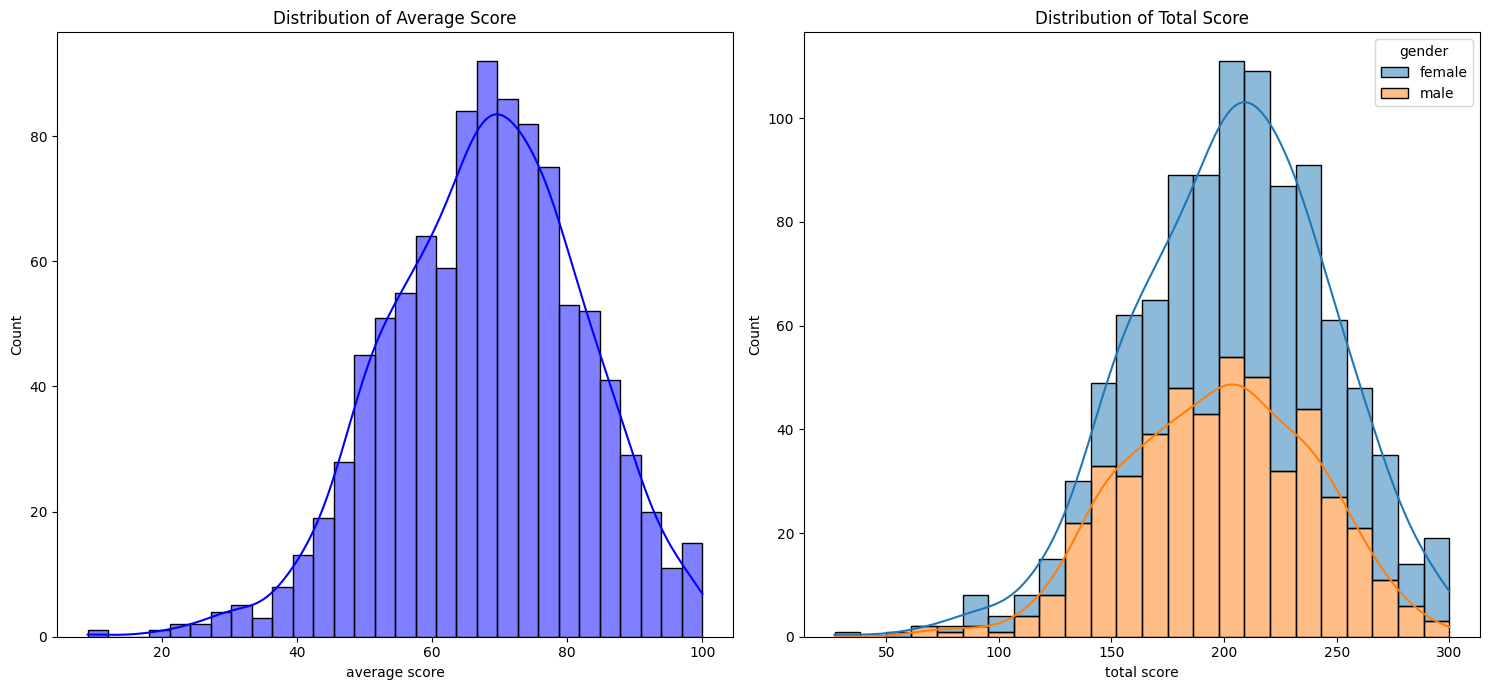

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score', kde=True, color='blue', bins=30)
plt.title('Distribution of Average Score')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, color='green', hue='gender', multiple='stack')
plt.title('Distribution of Total Score')
plt.tight_layout()
plt.show()